<a href="https://colab.research.google.com/github/Venkat-1999/assigment3-4/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accesed the diabetes data file  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')




Getting summary of Glucose attribute for population in data for further process

In [2]:
# Display summary statistics of the Glucose variable
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

print(f"Population Mean Glucose: {population_mean_glucose}")
print(f"Population Max Glucose: {population_max_glucose}")

Population Mean Glucose: 120.89453125
Population Max Glucose: 199


A)set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison

In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Display the sample
print(sample)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
204            6      103             72             32      190  37.7   
97             1       71             48             18       76  20.4   
336            0      117              0              0        0  33.8   
568            4      154             72             29      126  31.3   
148            5      147             78              0        0  33.7   
667           10      111             70             27        0  27.5   
212            7      179             95             31        0  34.2   
199            4      148             

Sample Mean Glucose: 116.64
Sample Max Glucose: 183


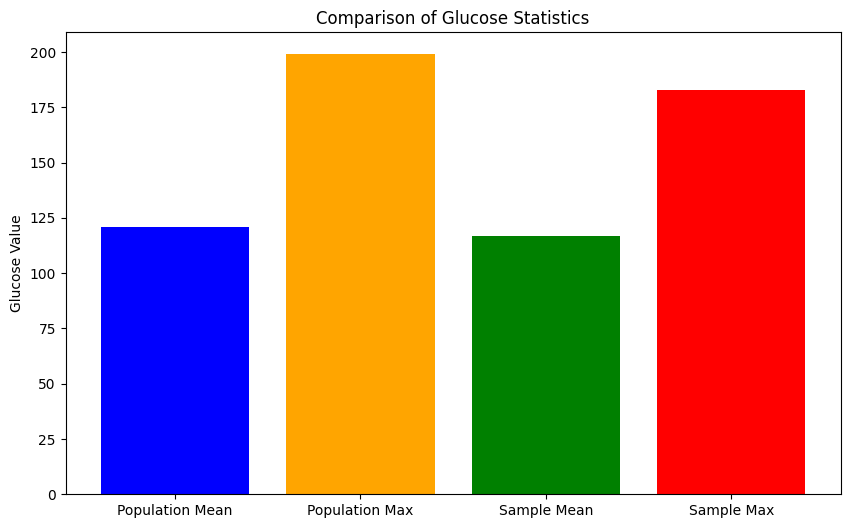

In [4]:
# Calculate statistics for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

print(f"Sample Mean Glucose: {sample_mean_glucose}")
print(f"Sample Max Glucose: {sample_max_glucose}")

# Create a bar chart to compare mean and max glucose values
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Value')
plt.show()


B) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts

In [5]:
# Compute the 98th percentile of BMI for the population
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

print(f"Population 98th Percentile of BMI: {population_98th_percentile_bmi}")

Population 98th Percentile of BMI: 47.52599999999996


In [6]:
# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Compute the 98th percentile of BMI for the sample
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

print(f"Sample 98th Percentile of BMI: {sample_98th_percentile_bmi}")


Sample 98th Percentile of BMI: 40.248


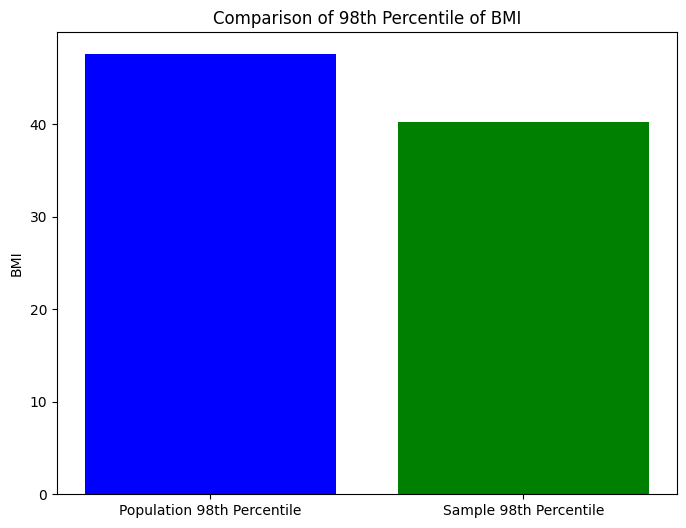

In [7]:
# Create labels and values for the bar chart
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_98th_percentile_bmi, sample_98th_percentile_bmi]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()


C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings

In [8]:
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_95_bp = np.percentile(data['BloodPressure'], 95)

print(f"Population Mean BloodPressure: {population_mean_bp}")
print(f"Population Standard Deviation BloodPressure: {population_std_bp}")
print(f"Population 95th Percentile of BloodPressure: {population_percentile_95_bp}")

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 95th Percentile of BloodPressure: 90.0


In [9]:
# Set the number of bootstrap samples and sample size
num_samples = 500
sample_size = 150

# Initialize arrays to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Perform bootstrap sampling
for _ in range(num_samples):
    # Sample with replacement
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)

    # Compute statistics for the bootstrap sample
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std = bootstrap_sample.std()
    bootstrap_percentile_95 = np.percentile(bootstrap_sample, 95)

    # Append to arrays
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile_95)


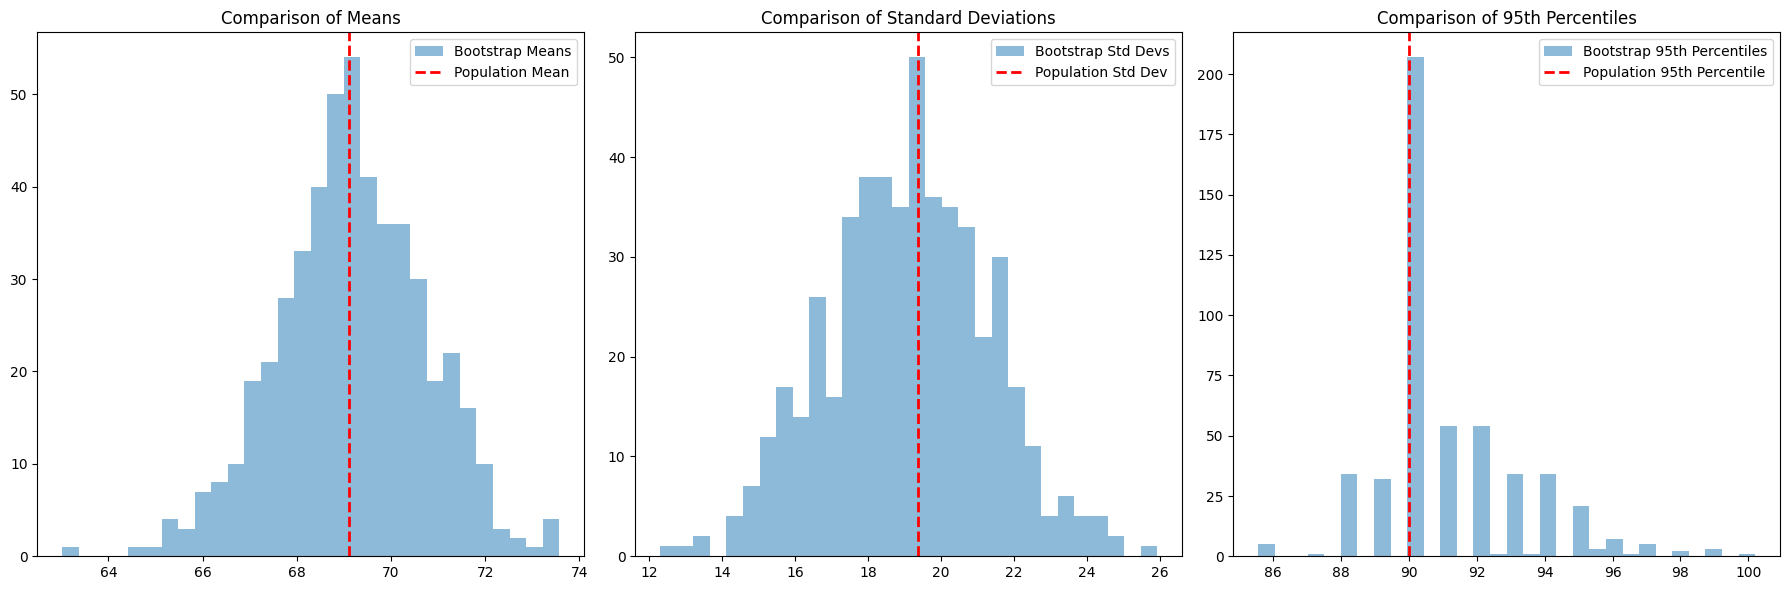

In [10]:
# Plotting histograms for comparison
plt.figure(figsize=(18, 6))

# Plotting Mean comparison
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.5, label='Bootstrap Means')
plt.axvline(population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Comparison of Means')
plt.legend()

# Plotting Standard Deviation comparison
plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=30, alpha=0.5, label='Bootstrap Std Devs')
plt.axvline(population_std_bp, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title('Comparison of Standard Deviations')
plt.legend()

# Plotting 95th Percentile comparison
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, alpha=0.5, label='Bootstrap 95th Percentiles')
plt.axvline(population_percentile_95_bp, color='red', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
plt.title('Comparison of 95th Percentiles')
plt.legend()

plt.tight_layout()
plt.show()
